### CIR model for interest rates and liability hedging
- Cox Ingersoll Ross model is used to model dynamics of interest rates
- It is an extension of basic Vasicek Model to prevent negative interest rates

In [1]:
import ipywidgets as widgets
from IPython.display import display

%load_ext autoreload
%autoreload 2
%matplotlib inline
import risk_kit as rk
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
def inst_to_ann(r):
    """
    Converts short rate to an annualized rate
    """
    return np.expm1(r)

def ann_to_inst(r):
    """
    Converts annualized to a short rate
    """
    return np.log1p(r)

In [14]:
def cir(n_years=10, n_scenarios=1, a=0.05, b=0.03, sigma=0.05, 
        steps_per_year=12, r_0=None):
    """Implements the CIR model"""
    if r_0 is None: r_0 = b
    r_0 = ann_to_inst(r_0)
    dt = 1 / steps_per_year
    
    num_steps = int(n_years * steps_per_year) + 1
    shock = np.random.normal(0, scale=np.sqrt(dt), size=(num_steps, n_scenarios))
    rates = np.empty_like(shock)
    rates[0] = r_0
    
    for step in range(1, num_steps):
        r_t = rates[step - 1]
        d_r_t = a*(b - r_t)*dt + sigma*np.sqrt(r_t)*shock[step]
        rates[step] = abs(r_t + d_r_t)
        
    return pd.DataFrame(data=inst_to_ann(rates), index=range(num_steps))

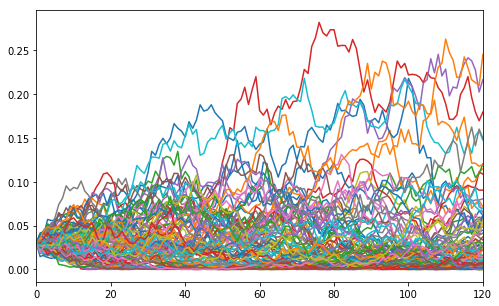

In [16]:
cir(n_scenarios=100, sigma=0.1).plot(figsize=(8,5), legend=False)

In [18]:
def show_cir_prices(r_0=0.03, a=0.05, b=0.03, sigma=0.05, n_scenarios=5):
    cir(r_0=r_0, a=a, b=b, sigma=sigma,
        n_scenarios=n_scenarios).plot(legend=False, figsize=(8,5))
    
controls = widgets.interactive(show_cir_prices,
                              r_0=(0, 0.15, 0.01),
                              a=(0, 1, 0.1),
                              b=(0, 0.15, 0.01),
                              sigma=(0, 0.1, 0.01),
                              n_scenarios=(0, 100))

display(controls)

interactive(children=(FloatSlider(value=0.03, description='r_0', max=0.15, step=0.01), FloatSlider(value=0.05,…

In [21]:
a_0 = 0.75 # asset 
rates, bond_prices = cir(n_years=10, r_0=0.03, b=0.03, n_scenarios=10)

In [23]:
liabilities = bond_prices

NameError: name 'bond_prices' is not defined